# Earthquake Deformation and Locating [20 points]

**This assignment has two main parts:**

1) Revisit the global earthquake catalog, make a map that shows magnitude and make interpretations about where the largest earthquakes happen. **[10 points]**

2) Plot the seismograph associated with the largest earthquake of 2025 and make interpretations related to seismic wave travel time. **[10 points]**

**To do these things, you will need to be using the python libraries we have used thus far:**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader

## The global earthquake catalog **[12 points]**
Revisit the global earthquake catalog from the in-class notebook with large earthquakes from the past decade. Please use Aug. 31, 2015-Sep. 1, 2025. Start by importing all of the earthquakes for this period into a pandas dataframe. Please, name your dataframe `EQ_data` we as did in-class.

<font color=goldenrod>**_Code for you to write_**</font> **[2 points]**

In [2]:
start_day = '2015-09-01'
end_day = '2025-08-31'
min_magnitude = '5'
standard_url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&orderby=magnitude'

query_url = standard_url + '&starttime=' + start_day + '&endtime=' + end_day + '&minmagnitude=' + min_magnitude
EQ_data = pd.read_csv(query_url)
EQ_data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-07-29T23:24:52.480Z,52.4980,160.2637,35.00,8.8,mww,251.0,30.0,1.113,0.77,...,2025-09-08T00:08:10.525Z,"2025 Kamchatka Peninsula, Russia Earthquake",earthquake,7.62,1.805,0.018,303.0,reviewed,us,us
1,2015-09-16T22:54:32.860Z,-31.5729,-71.6744,22.44,8.3,mww,NaN,19.0,0.684,1.02,...,2025-08-21T23:16:18.163Z,"48 km W of Illapel, Chile",earthquake,4.70,3.200,NaN,NaN,reviewed,us,us
2,2021-07-29T06:15:49.188Z,55.3635,-157.8876,35.00,8.2,mww,NaN,NaN,NaN,0.95,...,2025-07-03T00:44:30.948Z,Alaska Peninsula,earthquake,NaN,0.000,NaN,NaN,reviewed,ak,ak
3,2018-08-19T00:19:40.670Z,-18.1125,-178.1530,600.00,8.2,mww,NaN,13.0,3.630,0.79,...,2023-07-04T05:45:52.658Z,"267 km E of Levuka, Fiji",earthquake,9.60,1.900,0.045,47.0,reviewed,us,us
4,2017-09-08T04:49:19.180Z,15.0222,-93.8993,47.39,8.2,mww,NaN,22.0,0.944,1.22,...,2025-08-09T01:08:31.153Z,"2017 Tehuantepec, Mexico Earthquake",earthquake,6.20,3.700,0.058,29.0,reviewed,us,us


In [3]:
EQ_data.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,17351.000000,17351.000000,17351.000000,17351.000000,5941.000000,17214.000000,17206.000000,17351.000000,17235.000000,17351.000000,16247.000000,16344.000000
mean,-2.380943,34.168432,52.477422,5.331419,112.861303,61.374556,4.260097,0.814432,7.657149,2.887615,0.065963,76.412384
std,31.426260,123.713948,102.755452,0.402659,61.623364,34.932886,5.185320,0.229660,2.420317,1.862423,0.026158,105.299224
min,-69.773900,-179.989700,-1.010000,5.000000,6.000000,8.000000,0.000000,0.060000,0.080000,0.000000,0.000000,0.000000
25%,-22.928750,-73.215700,10.000000,5.000000,70.000000,35.000000,1.287000,0.650000,6.100000,1.800000,0.049000,20.000000
50%,-5.572900,93.997300,11.000000,5.200000,102.000000,54.000000,2.546500,0.800000,7.600000,1.900000,0.063000,39.000000
75%,19.718000,142.817750,45.000000,5.500000,138.000000,79.000000,5.111000,0.960000,9.200000,4.000000,0.080000,84.000000
max,87.386000,179.998100,670.810000,8.800000,619.000000,340.000000,41.046000,2.820000,21.100000,32.570000,0.563000,1027.000000


### Make a map of these earthquake locations

Make a map where you plot these earthquake locations. In addition to plotting the earthquake locations, we can plot the location of plate boundaries. I took the plate boundaries provided by the US Geological Survey (USGS) and split them by their categorization into trenches (subduction zones), ridges (spreading centers) and transform (strike-slip boundaries like the San Andreas fault). The raw data are here: https://www.sciencebase.gov/catalog/item/4f4e4a48e4b07f02db62303e
the data that are split out are in the data folder of this week's folder.

The code below makes a map where these different plate boundaries are represented by different color lines.

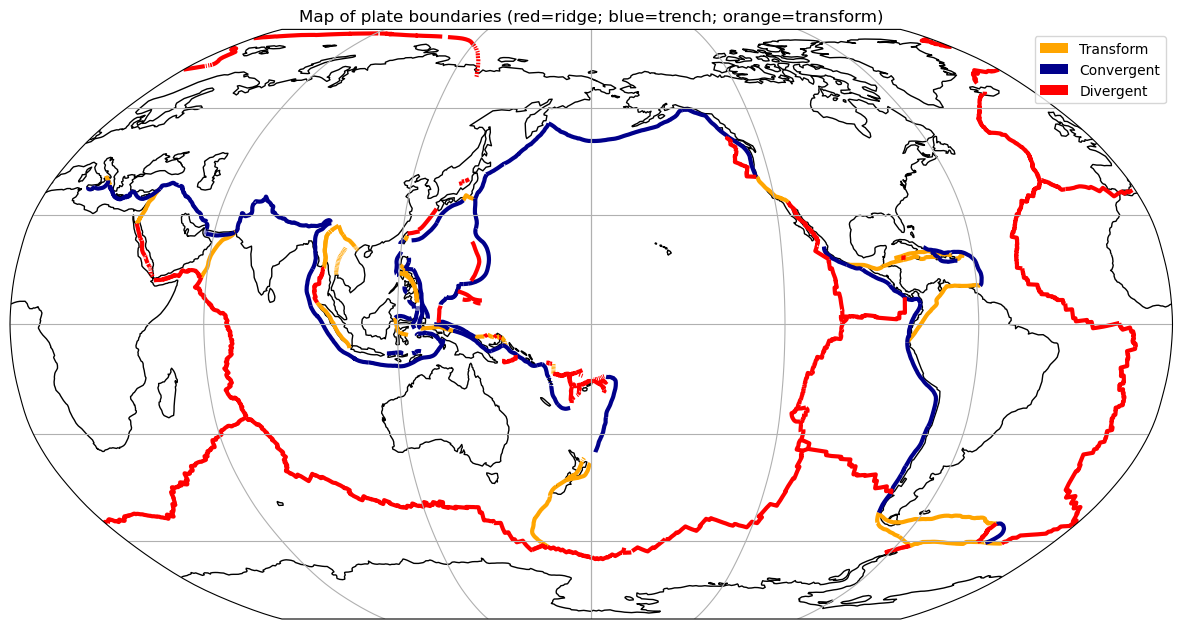

In [4]:
plt.figure(1,(15,15)) # make a big figure 

ax = plt.axes(projection=ccrs.Robinson(180))
ax.set_global()

ax.coastlines()
ax.gridlines()

data = Reader('data/Plate_Boundaries_transform.shp')
ax.add_geometries(data.geometries(), crs=ccrs.PlateCarree(), 
                  edgecolor='orange', facecolor='none',
                  linewidth=3)

data = Reader('data/Plate_Boundaries_trenches.shp')
ax.add_geometries(data.geometries(), crs=ccrs.PlateCarree(), 
                  edgecolor='darkblue', facecolor='none',
                  linewidth=3)

data = Reader('data/Plate_Boundaries_ridges.shp')
ax.add_geometries(data.geometries(), crs=ccrs.PlateCarree(), 
                  edgecolor='red', facecolor='none',
                  linewidth=3)

plt.title('Map of plate boundaries (red=ridge; blue=trench; orange=transform)')

# make patches to add to a legend
trans = mpatches.Rectangle((0, 0), 1, 1, facecolor="orange")
con = mpatches.Rectangle((0, 0), 1, 1, facecolor="darkblue")
div = mpatches.Rectangle((0, 0), 1, 1, facecolor="red")
labels = ['Transform','Convergent','Divergent']
plt.legend([trans, con, div], labels)

plt.show()

**Make a new map where these plate boundaries are shown and the recent earthquake locations are also plotted on top.**

<font color=goldenrod>**_Code for you to write_**</font> **[1 points]**

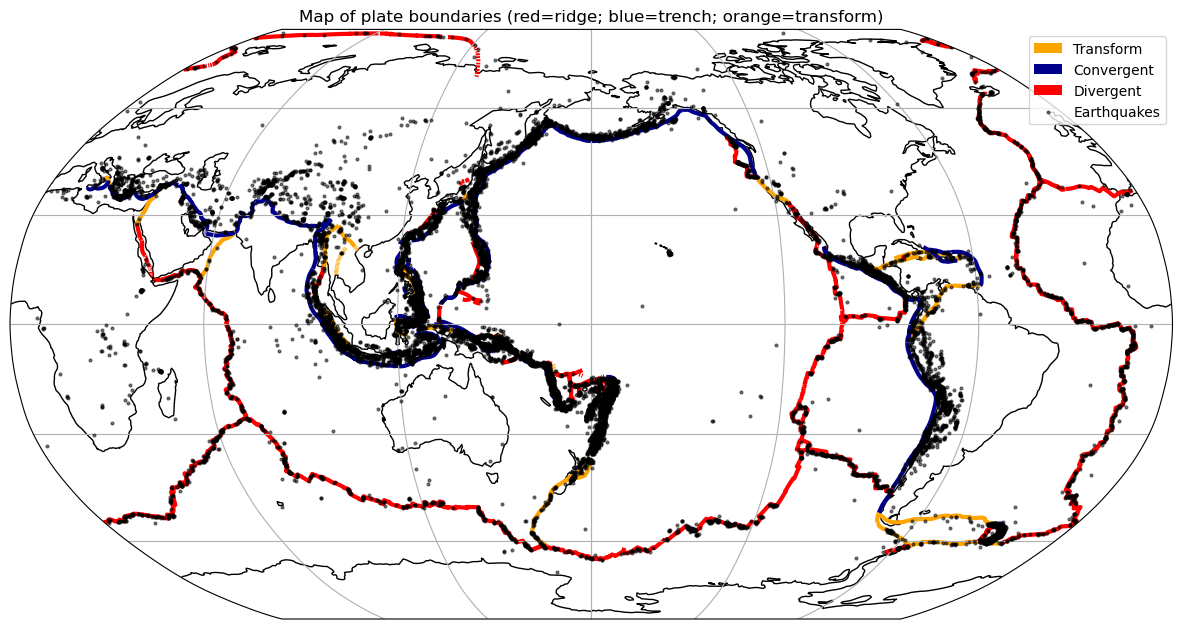

In [5]:
plt.figure(1,(15,15)) # make a big figure 

ax = plt.axes(projection=ccrs.Robinson(180))
ax.set_global()

ax.coastlines()
ax.gridlines()

data = Reader('data/Plate_Boundaries_transform.shp')
ax.add_geometries(data.geometries(), crs=ccrs.PlateCarree(), 
                  edgecolor='orange', facecolor='none',
                  linewidth=3)

data = Reader('data/Plate_Boundaries_trenches.shp')
ax.add_geometries(data.geometries(), crs=ccrs.PlateCarree(), 
                  edgecolor='darkblue', facecolor='none',
                  linewidth=3)

data = Reader('data/Plate_Boundaries_ridges.shp')
ax.add_geometries(data.geometries(), crs=ccrs.PlateCarree(), 
                  edgecolor='red', facecolor='none',
                  linewidth=3)

eq_color = 'black'
eq_scatter = plt.scatter(EQ_data['longitude'], EQ_data['latitude'],color=eq_color, alpha=.5, s=4,transform=ccrs.PlateCarree(), zorder=5, label='Earthquakes')

plt.title('Map of plate boundaries (red=ridge; blue=trench; orange=transform)')

# make patches to add to a legend
trans = mpatches.Rectangle((0, 0), 1, 1, facecolor="orange")
con = mpatches.Rectangle((0, 0), 1, 1, facecolor="darkblue")
div = mpatches.Rectangle((0, 0), 1, 1, facecolor="red")
labels = ['Transform','Convergent','Divergent', 'Earthquakes']
plt.legend([trans, con, div, eq_scatter], labels)

plt.show()

**Make a map that categorizes earthquakes by magnitude in increments of 1.** 

Here is my suggestion for how this could be done:
- Filter the global earthquake catalog dataframe to make a new dataframe that only has large earthquakes (magnitude 5 or greater but less than 6), another that only has the larger earthquakes (magnitude 6 or greater but less than 7) and another that only has the even larges earthquakes (magnitude 7 or greater but less than 8), and a final dataframe that has only the very largest earthquakes (greater than 8) and make a map where they are plotted along with all the other earthquakes, but in a separate colors/sizes. A dataframe can be filtered using syntax like this where `dataframe` is the name of the dataframe that has your data and `dataframe_new` being whatever name you want to assign to your new dataframe: 

`dataframe_new = dataframe[dataframe['column_a'] >= some_value]` e.g. `earthquakes_mag5 = EQ_data[EQ_data['mag'] >= 5]`

It can also be filtered by multiple conditions like this:

`dataframe_new = dataframe[(dataframe['column_a'] >= 5) & (dataframe['column_a'] < 6)]`

<font color=goldenrod>**_Code for you to write_**</font> **[2 points]**

In [6]:
#Declare dataframes filtered by magnitude. 
#Call these dataframes earthquakes_mag5, earthquake_mag6, earthquake_mag7, and earthquakes_mag8
earthquakes_mag5 = EQ_data[(EQ_data['mag']>=5) & (EQ_data['mag']<6)]
earthquakes_mag6 = EQ_data[(EQ_data['mag']>=6) & (EQ_data['mag']<7)]
earthquakes_mag7 = EQ_data[(EQ_data['mag']>=7) & (EQ_data['mag']<8)]
earthquakes_mag8 = EQ_data[(EQ_data['mag']>=8)]

As a check, there should be **16009** events in `earthquakes_mag5`, **1206** events in `earthquakes_mag6`, **128** events in `earthquakes_mag7`, and **8** events in `earthquakes_mag8`. Use the `len` function in the box below to check this.

<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**

In [7]:
#Use len to find the number of earthquakes in each dataframe
for df in [earthquakes_mag5,earthquakes_mag6,earthquakes_mag7,earthquakes_mag8]:
    print(len(df))

16009
1206
128
8


<font color=goldenrod>**_Code for you to write_**</font> **[2 points]**

Make a map plotting each category of earthquakes by magnitude.

Plot earthquakes of greater magnitude with larger symbols. In `plt.scatter` the `s=` parameter can be used to set symbol size. Make each symbol be twice as large as the previous on (e.g. `s=8` for `earthquakes_mag5` and `s=16` for `earthquakes_mag6`). You should label each.

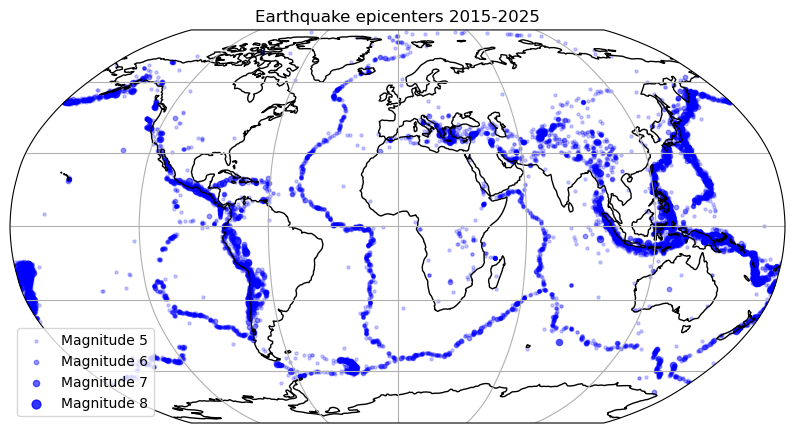

In [8]:
plt.figure(1,(10,10)) # make a big figure 
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()

ax.coastlines()
ax.gridlines()

#Plot earthquakes_mag5 longitudes versus latitude, give label, and size
ax.scatter(earthquakes_mag5['longitude'],earthquakes_mag5['latitude'],transform=ccrs.PlateCarree(), color='blue',s=5,label='Magnitude 5', alpha=0.2)
ax.scatter(earthquakes_mag6['longitude'],earthquakes_mag6['latitude'],transform=ccrs.PlateCarree(), color='blue',s=10,label='Magnitude 6', alpha=0.4)
ax.scatter(earthquakes_mag7['longitude'],earthquakes_mag7['latitude'],transform=ccrs.PlateCarree(), color='blue',s=20,label='Magnitude 7', alpha=0.6)
ax.scatter(earthquakes_mag8['longitude'],earthquakes_mag8['latitude'],transform=ccrs.PlateCarree(), color='blue',s=40,label='Magnitude 8', alpha=0.8)
# Add ax.scatter() for the rest of the magnitude dataframes. 
# Make sure to label them so that they show up in the legend

plt.title('Earthquake epicenters 2015-2025')

plt.legend()        
plt.show()

**Make a graph of earthquake depth.** 

<font color=goldenrod>**_Code for you to write_**</font> **[2 points]**

We've looked at the spatial distribution, now let's look at the depth distribution of earthquakes. Plot a scatter graph of **earthquake magnitude on the x-axis**, against **earthquake depth on the y-axis**. Use your magnitude dataframes to plot a different colour for each magnitude.

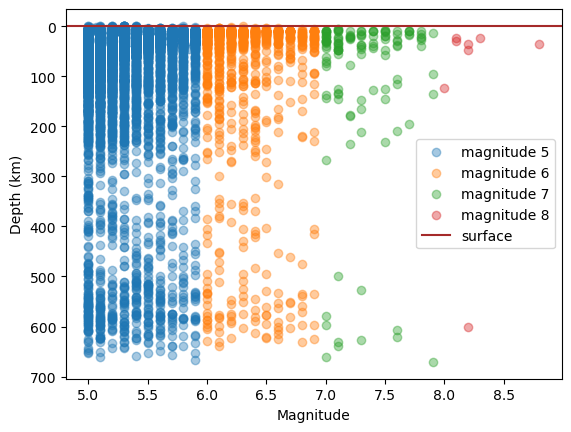

In [9]:
#Use plt.scatter() to plot the magnitude (x-axis) versus the depth (y-axis) for each of earthquake_mag5, earthquake_mag6
#, earthquake_mag7, and earthquake_mag8

#Start for earthquakes_mag5
plt.scatter(earthquakes_mag5['mag'],earthquakes_mag5['depth'],label='magnitude 5',alpha=0.4)
plt.scatter(earthquakes_mag6['mag'],earthquakes_mag6['depth'],label='magnitude 6',alpha=0.4)
plt.scatter(earthquakes_mag7['mag'],earthquakes_mag7['depth'],label='magnitude 7',alpha=0.4)
plt.scatter(earthquakes_mag8['mag'],earthquakes_mag8['depth'],label='magnitude 8',alpha=0.4)
# Add plt.scatter() for the rest of the magnitude dataframes. 

plt.gca().axhline(y=0, color='brown', label='surface')

# Make sure to label them so that they show up in the legend
plt.gca().invert_yaxis()
plt.xlabel('Magnitude')
plt.ylabel('Depth (km)')
plt.legend()

plt.show()

After you have made such a map and graph, answer these questions:

<font color=red>**_Questions_**</font>
- *At what type of plate boundaries do the largest earthquakes occur?*
- *At what depths do the largest earthquakes occur?*

<font color=goldenrod>**_Write your answers here_**</font> **[2 points]**

<ol>
    <li><font color='blue'> The largest earthquakes occur at convergent boundaries.</font></li>
    <li><font color='blue'> The largest earthquakes occur most frequently less than 100 km beneath the surface.</font></li>
<ol>

## Largest Earthquake in 2023 **[12 points]**

The largest earthquake of 2023 was the 6th of February Pazarcik earthquake, in the Kahramanmaras earthquake sequence in Turkey at 37.2256°N	37.0143°E and was a magnitude 7.8 event.

Below is a map of the earthquake location and the location of the Jenkinsville, South Carolina, USA seismic station that recorded a seismograph we will be analyzing.

Go ahead and **add plate boundaries to this map as well.**

<font color=goldenrod>**_Code for you to write_**</font> **[2 points]**

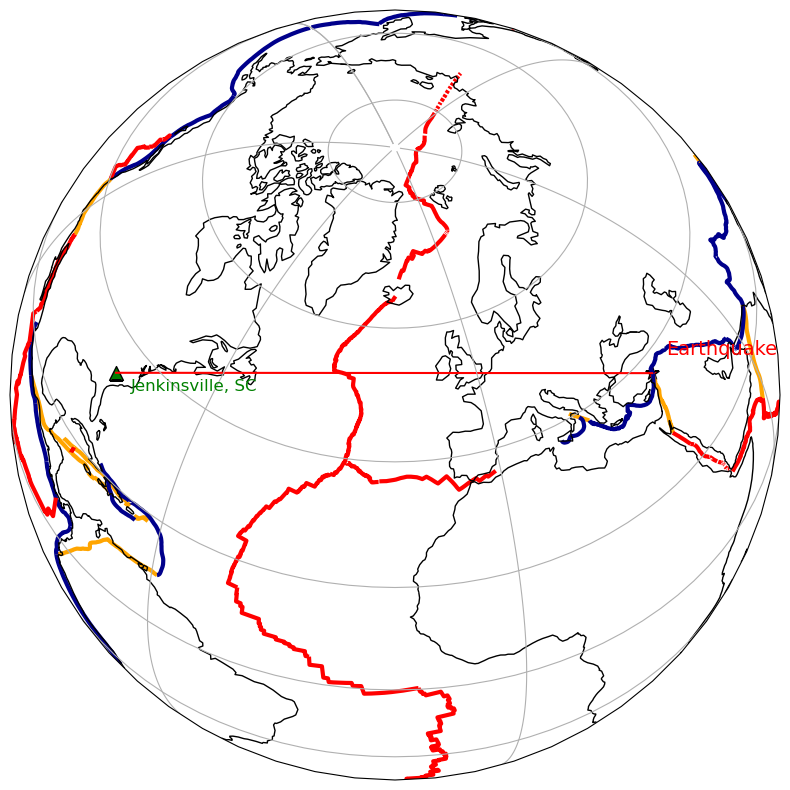

In [10]:
# Earthquake location
Earthquake_lat = 37.2256
Earthquake_lon = 37.0143

# Station Location Jenkinsville, South Carolina, USA
station_lat = 34.28
station_lon = -81.26

plt.figure(1,(10,10))

ax = plt.axes(projection=ccrs.Orthographic(central_longitude=-20,central_latitude=50))
ax.set_global()

plt.scatter(Earthquake_lon,Earthquake_lat,s=100,marker='*',
            color='red', edgecolor='black',transform=ccrs.PlateCarree())
plt.text(Earthquake_lon+5,Earthquake_lat,'Earthquake',fontsize=14,color='red',
         transform=ccrs.PlateCarree(), zorder=10)

plt.scatter(station_lon,station_lat,s=100,marker='^',
            color='green', edgecolor='black',transform=ccrs.PlateCarree())
plt.text(station_lon+5,station_lat,'Jenkinsville, SC',fontsize=12,color='green',
         transform=ccrs.PlateCarree())

plt.plot([Earthquake_lon,station_lon],[Earthquake_lat,station_lat],
         color='red',transform=ccrs.Geodetic())


# _______ADD THREE TYPES OF PLATE BOUNDARIES HERE_______

data = Reader('data/Plate_Boundaries_transform.shp')
ax.add_geometries(data.geometries(), crs=ccrs.PlateCarree(), 
                  edgecolor='orange', facecolor='none',
                  linewidth=3)

data = Reader('data/Plate_Boundaries_trenches.shp')
ax.add_geometries(data.geometries(), crs=ccrs.PlateCarree(), 
                  edgecolor='darkblue', facecolor='none',
                  linewidth=3)

data = Reader('data/Plate_Boundaries_ridges.shp')
ax.add_geometries(data.geometries(), crs=ccrs.PlateCarree(), 
                  edgecolor='red', facecolor='none',
                  linewidth=3)

ax.coastlines()
ax.gridlines()

plt.show()

More geologic context about this quake can be found here: https://earthquake.usgs.gov/storymap/index-turkey2023.html

### Load a Seismogram of this Earthquake

Let's load the .csv (Comma Separated Variable) data file of the seismogram of the largest earthquake that occured in the past month, recorded at the Jenkinsville, SC, USA seismic station (operated by us here at USC). Samples were taken every 0.01 seconds (100 samples per second, or 100 Hz) and the record starts 120 seconds before the P wave arrival. https://www.iris.edu/app/station_monitor/#2023-02-06/CO-JSC/webicorder/

There are "header" rows in this file, which means that there are rows before the data that contain extra information. Pandas `read_csv` can remove these header lines by telling it how many there are, in this case there are 9 so we use `header=9` to skip the first 9 lines of the file.

In [11]:
seismogram = pd.read_csv('data/CO.JSC.00.HHZ.M.2023-02-06T012825.008393.csv',header=9,names=['Time','Sample'])

seismogram.head()

,Time,Sample
0,2023-02-06T01:28:25.018393Z,-482
1,2023-02-06T01:28:25.028393Z,-416
2,2023-02-06T01:28:25.038393Z,-526
3,2023-02-06T01:28:25.048393Z,-536
4,2023-02-06T01:28:25.058393Z,-466


The `seismogram['Sample']` column is a time series of the velocity of the ground motion at the location of the seismic station due to this earthquake. Let's save it as a variable called `velocity`, i.e. the velocity that the ground moved at as the earthquake waves arrived.

<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**

In [12]:
velocity = seismogram['Sample']

Now let's parse the `seismogram['Time']` column from a string to a pandas datetime object. To do this we use the function `pd.to_datetime()`. We'll see more datetime features in the future, they're pretty great.

In [13]:
time = pd.to_datetime(seismogram['Time'])

Let's plot the seismogram (`time` on the x-axis and `velocity` on the y-axis), add labels and use `ax.annotate` to label the P and S waves' arrivals. 

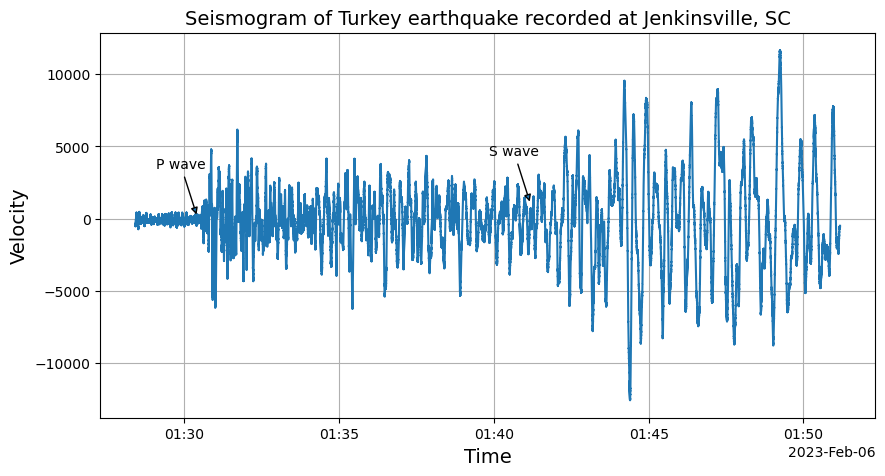

In [14]:
fig = plt.figure(1,(10,5))
ax = fig.add_subplot()

plt.plot(mdates.date2num(time), velocity)
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Velocity', fontsize=14)
plt.title('Seismogram of Turkey earthquake recorded at Jenkinsville, SC', fontsize=14)

ax.annotate('P wave', (mdates.date2num(time[120*100]), 100), xytext=(-30, 35), 
            textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
ax.annotate('S wave', (mdates.date2num(time[766*100]), 1000), xytext=(-30, 35), 
            textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))

ax.grid(True)
plt.show()

Using the annotations, I have indicated when the P wave arrived (at 2023-02-06 01:30:25 UTC) and when the S wave arrived (10:46 minutes later at 2023-02-06 01:41:11 UTC). The P (primary) wave arrives before the S (secondary/shear) wave. The farther away an earthquake is from a receiver, the more time there is between the arrivals of the P and S waves. More seismograms for this quake can be viewed here: https://ds.iris.edu/gsv/tsplotForID.phtml?evid=11654205&useCache=1&epo=0&caller=map&maxMag=10

<img src="seis_wave_travel_time.png">

The difference in these arrival times can be used to determine the distance from the recording station to the earthquake using a travel time curve if we know the velocities of the waves through the Earth.  So first we need to know how these two waves behave — particularly their velocities. Check out this short video demonstration (click on the video the right once you click through the link). 

https://www.iris.edu/hq/inclass/animation/traveltime_curves_how_they_are_created

I found calculated P and S wave travel times for an earthquake at 33 km depth here (https://earthquake.usgs.gov/learn/topics/ttgraph.php) which is based on this study:

https://www.usgs.gov/programs/earthquake-hazards/earthquake-travel-times


*Kennett, B. L. N. and E. R. Engdahl (1991). Travel times for global earthquake location and phase identification, Geophys. J. Int., v 105, p 429-465.*

The data are within the data folder as `arrival_times.csv`. Let's import them as a dataframe.

In [15]:
travel_times = pd.read_csv('data/arrival_times.csv')
travel_times.head()

,degrees_from_quake,P_wave_time,S_wave_time
0,0.0,0.090000,0.156667
1,0.5,0.176667,0.306667
2,1.0,0.295000,0.520000
3,1.5,0.410000,0.726667
4,2.0,0.523333,0.930000


We can make a plot of the travel times.

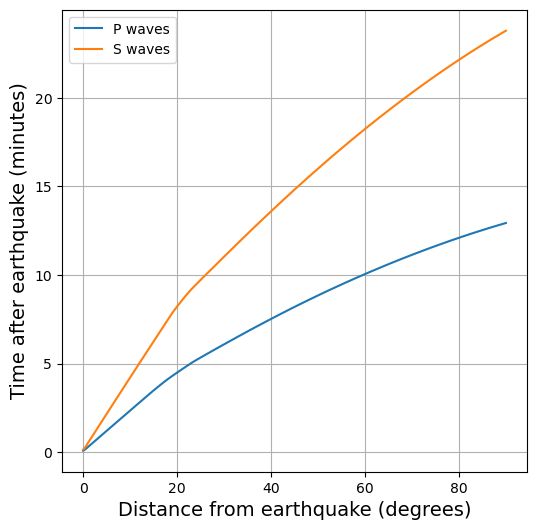

In [16]:
fig = plt.figure(1,(6,6))
plt.plot(travel_times['degrees_from_quake'],travel_times['P_wave_time'],label='P waves')
plt.plot(travel_times['degrees_from_quake'],travel_times['S_wave_time'],label='S waves')
plt.xlabel('Distance from earthquake (degrees)', fontsize=14)
plt.ylabel('Time after earthquake (minutes)', fontsize=14)
plt.legend()
plt.grid()
plt.show()


From the interpretation of the seismograph, we know that at Jenkinsville, the S wave arrived 10 minutes and 46 seconds after the P wave (10.75 decimal minutes). We want to use this travel time curve to estimate the distance. To start with, make a new column in the travel_times dataframe that is the difference between the two times. In pandas you can make a new column that is a calculation of other columns. So if you had a column called 'column_b' and one called 'column_a' you could make a new column like this:

```travel_times['new_column'] = travel_times['column_b'] - travel_times['column_a']```

<font color=goldenrod>**_Code for you to write_**</font> **[1 point]**

Make a new column called 'S-P_difference' that is the difference between the S wave time and the P wave time. 

In [17]:
#Create new column travel_times['S-P_difference'] by subtracting P wave times from S wave times
travel_times['S-P_difference'] = travel_times['S_wave_time'] - travel_times['P_wave_time']

<font color=goldenrod>**_Code for you to write_**</font> **[2 point]**

Make a plot of distance from the earthquake on the x-axis and the S-P differential time on the y-axis. Add labels, a title, a legend, and plot the time and distance values for JSC on there (89 degrees and 10.75 minutes). 


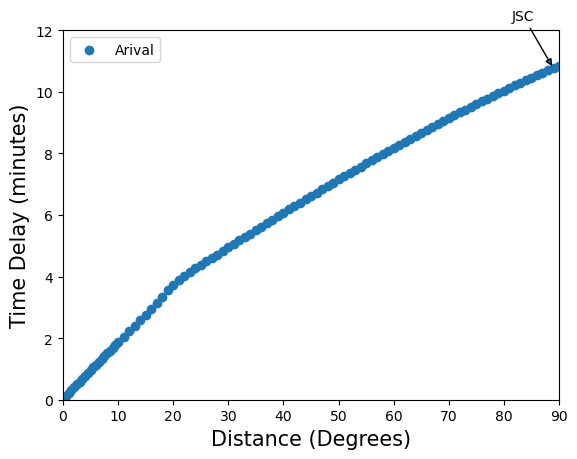

In [34]:
#Plot scatter plot of distance from earthquake (x-axis) versus S-P travel time difference (y-axis)
plt.scatter(travel_times['degrees_from_quake'], travel_times['S-P_difference'], label='Arival')

plt.xlabel('Distance (Degrees)', fontsize=15)
plt.ylabel('Time Delay (minutes)', fontsize=15)
plt.xlim(0, 90)
plt.ylim(0, 12)

plt.gca().annotate('JSC', (89, 10.75), xytext=(-30, 35), 
            textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))

plt.legend()
plt.show()

Once you have plotted this travel time difference curve, use it (and/or) the S-P_difference to estimate the distance in degrees. 

**Since we know that the S-P difference is about 10.75 minutes, we can find the distance that matches this S-P travel time difference.** Below, we're finding distances where the difference is very close to 10.75 (less than 0.1 minutes away).

In [35]:
travel_times['degrees_from_quake'][np.abs((travel_times['S-P_difference']-10.75))<0.1]

98     88.0
99     89.0
100    90.0
Name: degrees_from_quake, dtype: float64

Then convert this angular distance between the earthquake and the seismic station with the equation $d = r \theta $ where $d$ is the distance between the two points, $r$ is the radius (radius of Earth is 6371 kilometers), and $\theta$ is the angular separation between the points in radians. 

<font color=goldenrod>**_Code for you to write_**</font> **[2 points]**

In [38]:
radius = 6371 # earth's radius in kilometers
ang_deg = 89 # angular separation between EQ and station in degrees (we just found this in the cell above)
ang_rad = ang_deg * np.pi/180 # convert degrees to radians
dist = radius * ang_rad # distance in kilometers

print(f'{dist:.2f} distance to station from earthquake epicenter (km)')

9896.35 distance to station from earthquake epicenter (km)


<font color=red>**_Question:_**</font> ***What is the distance from station to earthquake epicentre in km*** 

Write answer in the box below

<font color=blue>**_Hint_**</font> The answer should be between 8000 and 10000 km.

9896 km

By computing the distance from the earthquake to at least three stations you can locate the epicenter of the earthquake by triangulation. 

<img src="IRIS_eq_tri.png">

### Turn in this notebook

Save your completed notebook, print the file to PDF, and upload the PDF on Blackboard.